# Анализ рынка общепита Москвы

- Автор: Анастасия Таначева
- Дата: 05.05

### Цели и задачи проекта

<font color='#777778'>Цель проекта:</font> проведение исследовательского анализа рынка общественного питания Москвы.

<font color='#777778'>Задачи проекта:</font>
1) ознакомиться с имеющимися данными

2) подготовить данные к анализу

3) провести исследовательский анализ данных и ответить на поставленные вопросы

4) сформулировать на основе полученных сведений общий вывод и рекомендации для коллег

### Описание данных

1. Файл /datasets/rest_info.csv содержит информацию о заведениях общественного питания:

    - name — название заведения;

    - address — адрес заведения;

    - district — административный район, в котором находится заведение, например Центральный административный округ;

    - category — категория заведения, например «кафе», «пиццерия» или «кофейня»;

    - hours — информация о днях и часах работы;

    - rating — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);

    - chain — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
        
        - 0 — заведение не является сетевым;
        - 1 — заведение является сетевым.

    - seats — количество посадочных мест.


2. Файл /datasets/rest_price.csv содержит информацию о среднем чеке в заведениях общественного питания:

    - price — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;

    - avg_bill — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:

        - «Средний счёт: 1000–1500 ₽»;

        - «Цена чашки капучино: 130–220 ₽»;

        - «Цена бокала пива: 400–600 ₽».

    - middle_avg_bill — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:

        - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.

        - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.

        - Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.

    - middle_coffee_cup — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:

        - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.

        - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.

        - Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.


### Содержимое проекта

- загрузка данных и знакомство с ними
- предобработка данных
- анализ данных
- выводы и рекомендации

## 1. Загрузка данных и знакомство с ними

- Загрузите данные о заведениях общественного питания Москвы. Путь к файлам: `/datasets/rest_info.csv` и `/datasets/rest_price.csv`.

In [1]:
!pip install missingno
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
!pip install phik==0.11.1
from phik import phik_matrix

     |████████████████████████████████| 596 kB 2.7 MB/s eta 0:00:01
  Created wheel for phik: filename=phik-0.11.1-py3-none-any.whl size=599822 sha256=d488923d921ba4372b56abd735ed97390bfbd5ae4eed9b8c2a6b3ba628f106eb
  Stored in directory: /home/jovyan/.cache/pip/wheels/47/a3/a2/54f05f62f6f8c5532fab1bb745f1bad3b5f1d53267efde761d
Successfully built phik


In [2]:
file_path = 'https://code.s3.yandex.net/datasets/'
df_1 = pd.read_csv(f'{file_path}rest_info.csv')

display(df_1)

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0
...,...,...,...,...,...,...,...,...,...
8401,0342ad1a45ed41ba89dcba246a8267e5,Суши Мания,кафе,"Москва, Профсоюзная улица, 56",Юго-Западный административный округ,"ежедневно, 09:00–02:00",4.4,0,86.0
8402,ee6bb7c3650e47bd8186fca08eda1091,Миславнес,кафе,"Москва, Пролетарский проспект, 19, корп. 1",Южный административный округ,"ежедневно, 08:00–22:00",4.8,0,150.0
8403,62e8c64d4c89467aba608e39ef87616b,Самовар,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",3.9,0,150.0
8404,06a0db5ecd4842d48cd6350aa923e297,Чайхана Sabr,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",4.2,1,150.0


In [3]:
file_path = 'https://code.s3.yandex.net/datasets/'
df_2 = pd.read_csv(f'{file_path}rest_price.csv')

display(df_2)

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN
...,...,...,...,...,...
4053,962800540173458486f3c465437c2d8b,средние,Цена бокала пива:от 140 ₽,NaN,NaN
4054,4277890d659341848d7051cbf2e51f51,выше среднего,Средний счёт:1000–1500 ₽,1250.0,NaN
4055,026cbc478f9b4c3294a83458dcd89982,средние,NaN,NaN,NaN
4056,71cc394927204d45b81c3a91edb47955,NaN,Средний счёт:50–250 ₽,150.0,NaN


- Познакомьтесь с данными и изучите общую информацию о них.

In [4]:
display(df_1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


None

In [5]:
display(df_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


None

### Проанализировав предоставленный фрагмент данных, можно сделать следующие выводы:

<font color='#777778'>Объём данных:</font> в первом из предоставленных датасетов содержится 8406 строк и 9 столбцов. На мой взгляд, это хороший объем, который позволит провести статистический анализ и выявить некоторые закономерности. 

Во втором из представленных датасетов содержится 4058 строк и 5 столбцов. Этот датасетов меньше первого, однако и его данных должно быть достаточно для проведения качественного анализа. 

<font color='#777778'>Соответствие описания содержанию:</font> названия столбцов в первом датасете в целом соответствуют содержанию:
- name — название заведения;
- address — адрес заведения;
- district — административный район, в котором находится заведение, например Центральный административный округ;
- category — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- hours — информация о днях и часах работы;
- rating — рейтинг заведения по оценкам пользователей в Яндекс Картах;
- chain — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым;
- seats — количество посадочных мест.

Названия столбцов во втором датасете также соответствуют их содержанию:
- price — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- avg_bill — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
- middle_avg_bill — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»;
- middle_coffee_cup — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:

<font color='#777778'>Пропуски в первом датасете:</font> в данных присутствуют пропуски, однако большинство столбцов их не содержат. Пропуски встречаются в столбцах hours и seats.

<font color='#777778'>Пропуски во втором датасете:</font> в данных явно присутствуют пропуски. Они встречаются в столбцах price, avg_bill, middle_avg_bill, middle_coffee_cup. Отметим, впрочем, что в двух последних часть пропусков объясняется условиями заполнения этих столбцов. Так, в столбце middle_avg_bill может быть пропуск, если в столбце avg_bill значения нет или оно не начинается с подстроки «Средний счёт». В столбце middle_coffee_cup пропуск может возникнуть, если в стобце avg_bill значения нет или оно не начинается с подстроки «Цена одной чашки капучино».

<font color='#777778'>Типы данных:</font>
Типы данных, на мой взгляд, соответствуют содержанию ячеек, а значит их можно будет не менять далее. Можно было бы попробовать поменять тип данных в столбце seats на целочисленый (int), поскольку сейчас он float, что несколько странно, ведь у нас не среднее количество мест. Однако для этого нужно заполнить пропуски в этом столбце. Но заполнять их чем бы то ни было кажется мне некорректным, поскольку сильно исказит картину предоставленных данных.  

<font color='#777778'>Особенности данных и предобработка:</font>

1. Названия столбцов: названия столбцов хорошо отражают суть данных.
2. Пропуски: обработка пропусков критически важна. Необходимо решить, чем вызваны пропуски, как их заполнить (например, средним, или медианой, или модой), удалить строки с пропусками и оставить так, как есть. 
3. Дубликаты: стоит проверить данные на наличие явных и неявных дубликатов строк, которые могут исказить результаты анализа.

### Подготовка единого датафрейма

- Объедините данные двух датасетов в один, с которым вы и продолжите работу.

In [6]:
df = df_1.merge(df_2, how='left', on='id')

display(df)

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8401,0342ad1a45ed41ba89dcba246a8267e5,Суши Мания,кафе,"Москва, Профсоюзная улица, 56",Юго-Западный административный округ,"ежедневно, 09:00–02:00",4.4,0,86.0,NaN,NaN,NaN,NaN
8402,ee6bb7c3650e47bd8186fca08eda1091,Миславнес,кафе,"Москва, Пролетарский проспект, 19, корп. 1",Южный административный округ,"ежедневно, 08:00–22:00",4.8,0,150.0,NaN,NaN,NaN,NaN
8403,62e8c64d4c89467aba608e39ef87616b,Самовар,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",3.9,0,150.0,NaN,Средний счёт:от 150 ₽,150.0,NaN
8404,06a0db5ecd4842d48cd6350aa923e297,Чайхана Sabr,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",4.2,1,150.0,NaN,NaN,NaN,NaN


## 2. Предобработка данных

Подготовьте данные к исследовательскому анализу:

- Изучите корректность типов данных и при необходимости проведите их преобразование.

#### Тип данных во всех столбцах кажется мне корректным.

- Изучите пропущенные значения в данных: посчитайте их количество в каждом столбце датафрейме, изучите данные с пропущенными значениями и предположите гипотезы их появления. Проведите обработку пропущенных значений: вы можете заменить пропуски на определённое значение, удалить строки с пропусками или оставить их как есть.

In [7]:
param_param = (pd.DataFrame({'Кол-во пропусков': df.isnull().sum(), 'Доля пропусков': df.isnull().mean()*100})
           .sort_values(by='Кол-во пропусков', ascending=False)
           .style.background_gradient(cmap='coolwarm'))

display(param_param)

,Кол-во пропусков,Доля пропусков
middle_coffee_cup,7871,93.635498
middle_avg_bill,5257,62.538663
price,5091,60.563883
avg_bill,4590,54.603854
seats,3611,42.957411
hours,536,6.376398
id,0,0.000000
name,0,0.000000
category,0,0.000000
address,0,0.000000


<font color='#777778'>Краткое пояснение:</font> попробуем визуализировать коррелляцию пропусков с помощью библиотеки Missingno.   

<AxesSubplot:>

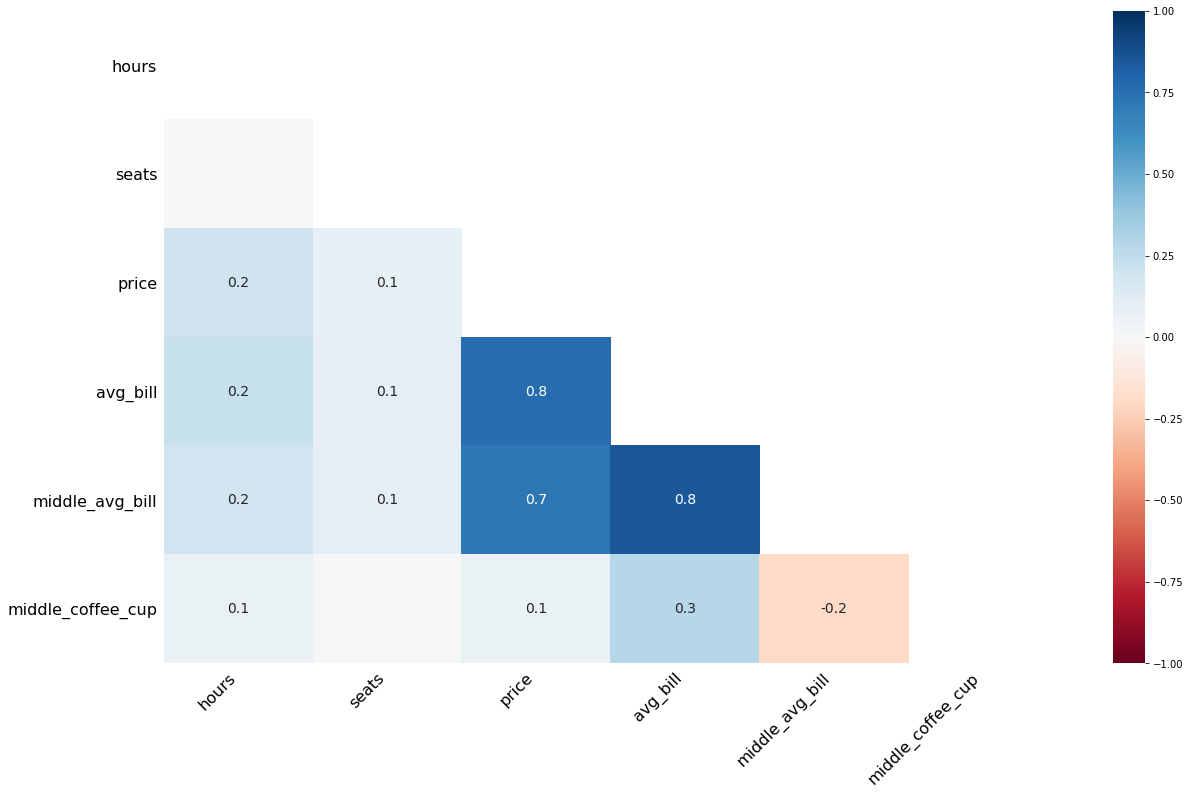

In [8]:
msno.heatmap(df)

<font color='#777778'>Комментарий:</font> 
Как я и указывала ранее, больше всего пропусков в столбцах middle_avg_bill и middle_coffee_cup, что может быть обусловлено тем, по какому принципу заполняются эти столбцы. Помимо этого, значительный процент пропусков наблюдается в столбцах seats (42,9%), price (60,6%), avg_bill (54,6%), а также незначительный в столбце hours (6,4%). Однако заполнять эти пропуски не кажется мне корректным, поскольку это может существенно исказить данные. 

Добавлю, что пропуски могут быть обусловлены менеджеры или руководители заведений не указывали некоторую информацию о своих заведениях, либо заполнили ее некорректно (это могло привести к пропускам в столбцах middle_avg_bill и middle_coffee_cup).  

- Проверьте данные на явные и неявные дубликаты, например поля с названием и адресом заведения. Для оптимизации проверки нормализуйте данные в текстовых столбцах, например с названием заведения.

- Сначала изучим уникальные значения в категориальных данных и нормализуем их (с названием заведения). При нормализации избавимся от неявных дубликатов.

In [9]:
df[['name', 'address']] = df[['name', 'address']].apply(lambda x: x.str.lower())

- Теперь посчитаем явные дубликаты в столбцах с названием заведения и его адресом.

In [10]:
duplicates = df.duplicated(subset=['name', 'address'], keep = 'first')
num_duplicates = duplicates.sum()

display(num_duplicates)

4

Удалим явные дубликаты:

In [11]:
df = df[duplicates == False]

- Для дальнейшей работы создайте столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

In [12]:
def check_24_7(hours):
    if pd.isna(hours):
        return False
    elif 'ежедневно' in hours and 'круглосуточно' in hours:
        return True
    else: 
        return False 
df['is_24_7'] = df['hours'].apply(check_24_7)

df[['name', 'hours', 'is_24_7']].head(25)

,name,hours,is_24_7
0,wowфли,"ежедневно, 10:00–22:00",False
1,четыре комнаты,"ежедневно, 10:00–22:00",False
2,хазри,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",False
3,dormouse coffee shop,"ежедневно, 09:00–22:00",False
4,иль марко,"ежедневно, 10:00–22:00",False
5,sergio pizza,"ежедневно, 10:00–23:00",False
6,огни города,пн 15:00–04:00; вт-вс 15:00–05:00,False
7,mr. уголёк,"пн-чт 10:00–22:00; пт,сб 10:00–23:00; вс 10:00...",False
8,donna maria,"ежедневно, 10:00–22:00",False
9,готика,"ежедневно, 12:00–00:00",False


In [13]:
value_counts = df['is_24_7'].value_counts()

display(value_counts)

False    7672
True      730
Name: is_24_7, dtype: int64

---

### Промежуточный вывод

После предобработки данных напишите промежуточный вывод о проведённой работе. Отразите количество или долю отфильтрованных данных, если вы что-то удаляли.

<font color='#777778'>Про пропуски:</font> проведя предобработку данных, я выявила, что больше всего пропусков в столбцах middle_avg_bill и middle_coffee_cup, что может быть обусловлено тем, по какому принципу заполняются эти столбцы. Помимо этого, значительный процент пропусков наблюдается в столбцах seats (42,9%), price (60,6%), avg_bill (54,6%), а также незначительный в столбце hours (6,4%). Я решила оставить эти пропуски, поскольку их не представляется верным заполнить. 

<font color='#777778'>Про тип данных:</font> я решила оставить изначальный тип данных, поскольку а) он кажется мне оптимальным почти для всех столбцов, б) я заменила бы тип данных в столбце seats, но для этого нужно заполнить пропуски, что некорректно.

<font color='#777778'>Про дубликаты:</font> выявлено 4 явных дубликата, позже они были удалены для более корректной дальнейшей работы с данными. Также значения столбцов name и address были приведены к единому стилю (нижнему регистру), чтобы избавиться от неявных дубликатов.

<font color='#777778'>Про работу заведений:</font> после добавления столбца is_24_7 и подсчета значений стало понятно, что лишь 730 из 8406 заведений работают круглосуточно. Эта информация может понадобиться коллегам при выборе режима работы их заведения. 

## 3. Исследовательский анализ данных
Проведите исследовательский анализ исходных данных.

При исследовании данных используйте визуализации. Проверьте, что для каждого случая подобран оптимальный тип визуализации с корректным оформлением. У графика должен быть заголовок, понятные подписи по осям, при необходимости легенда, а его размер является оптимальным для изучения.

После исследования каждого пункта оставляйте небольшой комментарий с выводом или обсуждением результата. В конце шага обобщите результаты, выделив, по вашему мнению, самые важные.



### Задача 1

Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по каждой категории.Результат сопроводите подходящей визуализацией.

In [14]:
replace_dict = {'административный округ': 'АО'}
df['district'] = df['district'].replace(replace_dict, regex=True)

In [15]:
# Вычисление доли по категориям
category_network_ratio = df['category'].value_counts()

display(category_network_ratio)

кафе               2376
ресторан           2042
кофейня            1413
бар,паб             764
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64

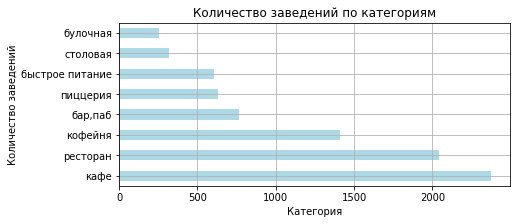

In [16]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df['category'].value_counts().plot(
               kind='barh',
               rot=0,
               legend=False, 
               color='lightblue',
               title=f'Количество заведений по категориям'
)

# Настраиваем оформление графика
plt.xlabel('Категория')
plt.ylabel('Количество заведений')

# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

<font color='#777778'>Краткое пояснение:</font> визуализация помогает нам с легкостью увидеть, что больше всего таких заведений, как кафе (2376 точек), на втором месте по количеству - ресторан (2042 точек), на третьем - кофейня (1413 точек). Меньше всего на карте Москвы можно встретить булочных (256 точек).

---

### Задача 2

Какие административные районы Москвы присутствуют в данных? Исследуйте распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. Результат сопроводите подходящими визуализациями.

In [17]:
category_network_ratio_1 = df['district'].value_counts()

display(category_network_ratio_1)

Центральный АО         2242
Северный АО             898
Южный АО                892
Северо-Восточный АО     890
Западный АО             850
Восточный АО            798
Юго-Восточный АО        714
Юго-Западный АО         709
Северо-Западный АО      409
Name: district, dtype: int64

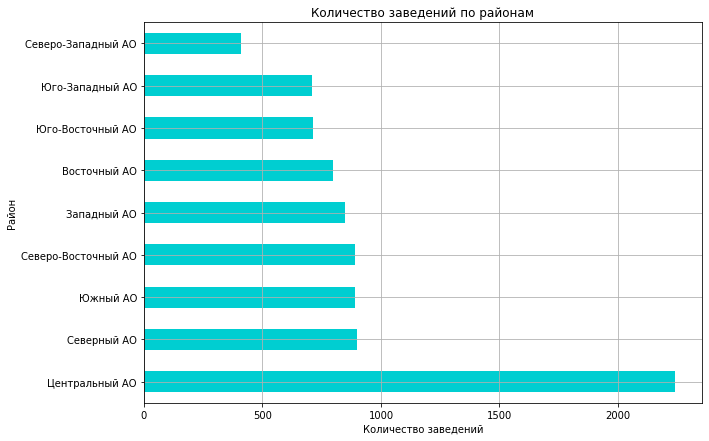

In [18]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 7))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df['district'].value_counts().plot(
               kind='barh',
               rot=0,
               legend=False, 
               color='darkturquoise',
               title=f'Количество заведений по районам'
)

# Настраиваем оформление графика
plt.xlabel('Количество заведений')
plt.ylabel('Район')

# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

<font color='#777778'>Краткое пояснение:</font> как и предполагалось, больше всего заведений общепита можно встретить в Центральном административном районе (2242 точки общепита), меньше всего - в Северо-Западном административном округе (409 точек).

In [19]:
df_cao=df[df['district'] == 'Центральный АО']


In [20]:
category_network_ratio_2 = df_cao['category'].value_counts()

display(category_network_ratio_2)


ресторан           670
кафе               464
кофейня            428
бар,паб            364
пиццерия           113
быстрое питание     87
столовая            66
булочная            50
Name: category, dtype: int64

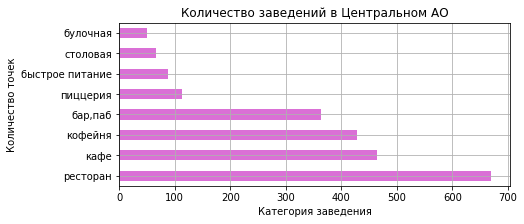

In [21]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df_cao['category'].value_counts().plot(
               kind='barh',
               rot=0,
               legend=False, 
               color='orchid',
               title=f'Количество заведений в Центральном АО'
)

# Настраиваем оформление графика
plt.xlabel('Категория заведения')
plt.ylabel('Количество точек')

# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()


<font color='#777778'>Краткое пояснение:</font> чаще всего в центре Москвы можно увидеть рестораны (их насчитывается 670), кафе (464 точки) и кофейни (428 точек). А вот столовую (66 точек) или булочную (50 точек) лучше поискать в других районах)

---

### Задача 3

Изучите соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? Исследуйте данные, ответьте на вопросы и постройте необходимые визуализации.

In [22]:
network_counts = df['chain'].value_counts()
print("Соотношение сетевых и несетевых заведений:")
print(network_counts)

# Вычисление доли
network_ratio = df['chain'].value_counts(normalize=True) * 100
print("\nДоля сетевых и несетевых заведений:")
print(network_ratio)


# 2. Соотношение сетевых и несетевых заведений в разрезе категорий
network_by_category = df.groupby(['category', 'chain']).size().unstack()
network_by_category.fillna(0, inplace=True)
print("\nСоотношение сетевых и несетевых заведений по категориям:")
print(network_by_category)

# Вычисление доли по категориям
category_network_ratio = df.groupby('category')['chain'].value_counts(normalize=True).unstack() * 100
category_network_ratio.fillna(0, inplace=True)
display("\nДоля сетевых и несетевых заведений по категориям:")
display(category_network_ratio)


Соотношение сетевых и несетевых заведений:
0    5199
1    3203
Name: chain, dtype: int64

Доля сетевых и несетевых заведений:
0    61.878124
1    38.121876
Name: chain, dtype: float64

Соотношение сетевых и несетевых заведений по категориям:
chain               0    1
category                  
бар,паб           596  168
булочная           99  157
быстрое питание   371  232
кафе             1597  779
кофейня           693  720
пиццерия          303  330
ресторан         1313  729
столовая          227   88


'\nДоля сетевых и несетевых заведений по категориям:'

chain,0,1
category,,
"бар,паб",78.010471,21.989529
булочная,38.671875,61.328125
быстрое питание,61.525705,38.474295
кафе,67.213805,32.786195
кофейня,49.044586,50.955414
пиццерия,47.867299,52.132701
ресторан,64.299706,35.700294
столовая,72.063492,27.936508


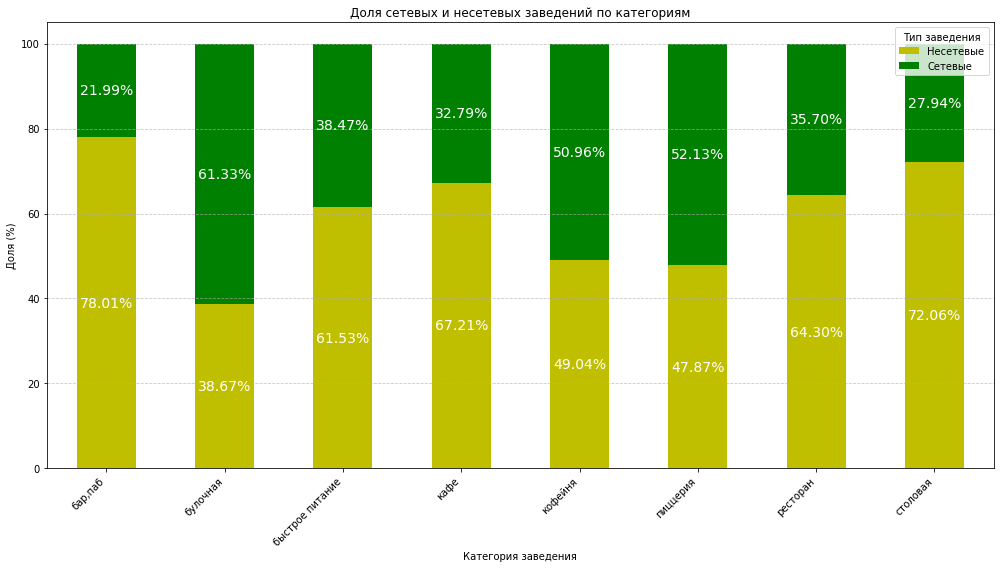

In [23]:
category_network_ratio.rename(columns={0: 'Несетевые', 1: 'Сетевые'}, inplace=True)

# Построение графика
ax = category_network_ratio.plot(kind='bar', stacked=True, figsize=(14, 8), color=['y', 'g'])
plt.title('Доля сетевых и несетевых заведений по категориям')
plt.xlabel('Категория заведения')
plt.ylabel('Доля (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Тип заведения')
plt.grid(axis='y', linestyle='--', alpha=0.7) 

# Добавление подписей значений на столбцы
for i, category in enumerate(category_network_ratio.index):
    cumulative_height = 0
    for j, chain_type in enumerate(category_network_ratio.columns):
        height = category_network_ratio.loc[category, chain_type]
        if height > 0:
            ax.annotate(f'{height:.2f}%', (i, cumulative_height + height / 2), ha='center', va='center', fontsize=14, color='w')
        cumulative_height += height


plt.tight_layout()
plt.show()

<font color='#777778'>Краткое пояснение:</font> больше всего на карте Москвы можно встретить несетевых заведений - их 5199 точки, тогда как сетевых - 3203. Чаще всего сетевыми являются булочные (61,33% из всех заведений - сетевые), пиццерии (52,13%), кофейни (50,96%), реже - столовые (27,94%), кафе (32,79%), бары, пабы (21,99%). 

---

### Задача 4

Исследуйте количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Приведите для каждой категории заведений наиболее типичное для него количество посадочных мест. Результат сопроводите подходящими визуализациями.


In [24]:
sorted_categories = df.groupby('category')['seats'].median().sort_values().index

In [25]:
sorted_categories_1 = df.groupby('category')['seats'].value_counts()

display(sorted_categories_1)

category  seats 
бар,паб   60.0      31
          40.0      27
          120.0     20
          90.0      18
          100.0     18
                    ..
столовая  310.0      1
          320.0      1
          428.0      1
          625.0      1
          1200.0     1
Name: seats, Length: 943, dtype: int64

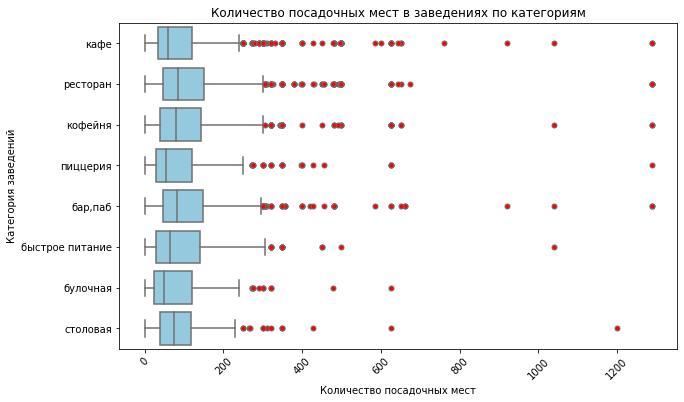

In [26]:
# Построение диаграммы размаха с выбросами
plt.figure(figsize=(10,6))
sns.boxplot(x= df['seats'], y= df['category'], flierprops=dict(markerfacecolor='r', marker='o'), color="skyblue")
plt.title('Количество посадочных мест в заведениях по категориям')
plt.ylabel('Категория заведений')
plt.xlabel('Количество посадочных мест')
plt.xticks(rotation=45)

plt.show()

<font color='#777778'>Краткое пояснение:</font> судя по визуализации, аномальные значения встречаются в заведениях таких категорий, как кафе, ресторан, кофейня, пиццерия, бар и паб. Можно увидеть, что встречаются такие данные, будто в перечисленных категориях заведений может быть больше 1,2 тыс. посадочных мест.

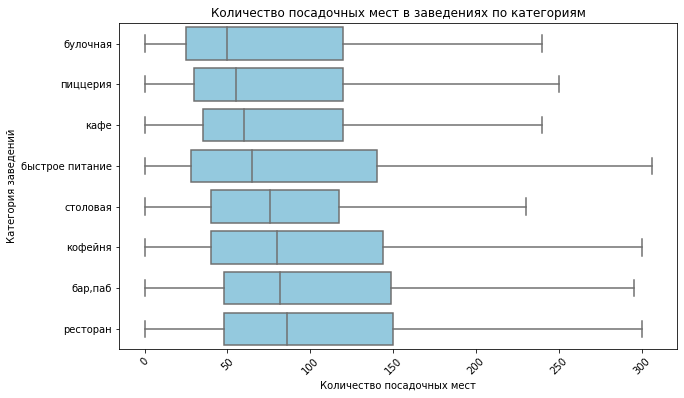

In [27]:
# Построение диаграммы размаха без выбросов с одним цветом и сортировкой
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['seats'], y=df['category'], showfliers=False, color="skyblue", order = sorted_categories)
plt.title('Количество посадочных мест в заведениях по категориям')
plt.ylabel('Категория заведений')
plt.xlabel('Количество посадочных мест')
plt.xticks(rotation=45)
plt.show()

<font color='#777778'>Краткое пояснение:</font> исходя из проанализированных данных, можно увидеть, что наиболее характерное количество посадочных мест:
 - для кафе - от 40 до 120;
 - для ресторана - от 50 до 150;
 - для кофейни - от 40 до 140;
 - для пиццерии - от 40 до 120;
 - для бара, паба - от 50 до 150;
 - для заведений быстрого питания - от 30 до 140;
 - для булочной - от 30 до 120;
 - для столовой - от 40 до 120.

---

### Задача 5

Исследуйте рейтинг заведений. Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?

In [28]:
df_agg = df.groupby('category').agg({'rating':'mean'})
display(df_agg)

,rating
category,
"бар,паб",4.387696
булочная,4.268359
быстрое питание,4.050249
кафе,4.124285
кофейня,4.277282
пиццерия,4.301264
ресторан,4.290402
столовая,4.211429


<Figure size 504x216 with 0 Axes>

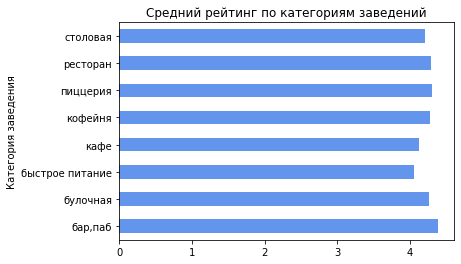

In [29]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df_agg = df.groupby('category').agg({'rating':'mean'})
# Настраиваем график
df_agg.plot.barh(legend=False,
                title='Средний рейтинг по категориям заведений',
                ylabel='Средний балл рейтинга',
                xlabel='Категория заведения',
                rot=0,
                color='cornflowerblue')
# Отображаем график
plt.show()

<font color='#777778'>Краткое пояснение:</font> по диаграмме видно, что усредненные рейтинги не сильно отличаются для разных типов общепита, находясь в среднем на уровне выше 4. В частности, у баров и пабов рейтинг 4,4, у булочных - 4,3, у кофеен - 4,2, кафе - 4,1. Однако можно заметить, что средний рейтинг заведений быстрого питания чуть ниже, чем у остальных категорий (4,05). Самый высокий средний рейтинг - у баров и пабов, кофеен, пиццерий и ресторанов.

---

### Задача 6

Изучите, с какими данными показывают самую сильную корреляцию рейтинги заведений? Постройте и визуализируйте матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберите самую сильную связь и проверьте её.

In [30]:
# Вычисляем корреляционную матрицу с использованием phi_k
correlation_matrix = df[['category', 'district', 'chain', 'seats', 'price',
                        'is_24_7', 'rating']].phik_matrix()

# Выводим результат
print('Корреляционная матрица с коэффициентом phi_k для переменной rating')
correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)

interval columns not set, guessing: ['chain', 'seats', 'rating']
Корреляционная матрица с коэффициентом phi_k для переменной rating


,rating
price,0.220295
district,0.200761
category,0.189716
is_24_7,0.150365
chain,0.107833
seats,0.000000


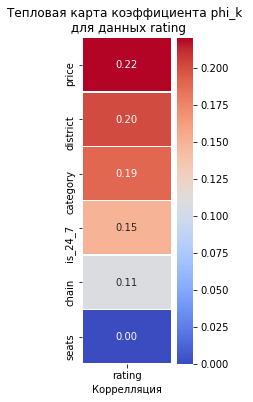

In [31]:
# Строим тепловую карту
plt.figure(figsize=(2, 6))

# Сохраняем матрицу корреляции признака churn с другими признаками клиента
data_heatmap = correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)
sns.heatmap(data_heatmap,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            linewidths=0.5
           )

# Добавляем заголовок и подпись по оси Х
plt.title('Тепловая карта коэффициента phi_k \n для данных rating')
plt.xlabel('Коррелляция')

# Выводим график
plt.show()

<font color='#777778'>Краткое пояснение:</font> Наибольшая корреляция рейтинга наблюдается с ценовой категорией (0,22), расположением (0,2) и категорией заведения (0,19). Корреляция рейтинга с ценовой категорией говорит о том, что у заведений с более высоким средним чеком выше и рейтинг. Корреляция с расположением говорит о том, что в чем более удобной локации расположено заведение, тем выше рейтинг. А вот корреляция с категорией наиболее интересна и, вероятно, говорит о предпочтениях отдельных пользователей.

---

### Задача 7

Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Для них посчитайте значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. К какой категории заведений они относятся? Результат сопроводите подходящими визуализациями.

In [32]:
# Фильтрация сетевых заведений
chain_df = df[df['chain'] == 1]

# Группировка по названиям сетевых заведений и подсчет количества
chain_counts = chain_df.groupby('name')['id'].count().reset_index()
chain_counts.columns = ['name', 'count']

# Выбор топ-15 сетевых заведений по популярности
top_15_chains = chain_counts.sort_values(by='count', ascending=False).head(15)

# Объединение с исходным DataFrame (сетевых заведений) для получения рейтинга и категории
top_15_chains_info = top_15_chains.merge(chain_df[['name', 'rating', 'category']], on='name', how='left')

# Группировка по названию сети и расчет среднего рейтинга
top_15_chains_avg_rating = top_15_chains_info.groupby('name').agg({'count': 'first', 'rating': 'mean', 'category': 'first'}).reset_index()

# Сортировка по count для корректного порядка в визуализациях
top_15_chains_avg_rating_sorted = top_15_chains_avg_rating.sort_values('count', ascending=False)

display(top_15_chains_avg_rating_sorted)

,name,count,rating,category
13,шоколадница,120,4.177500,кофейня
6,домино'с пицца,76,4.169737,пиццерия
5,додо пицца,74,4.286486,пиццерия
2,one price coffee,71,4.064789,кофейня
14,яндекс лавка,69,3.872464,ресторан
1,cofix,65,4.075385,кофейня
3,prime,50,4.116000,ресторан
11,хинкальная,44,4.322727,быстрое питание
7,кофепорт,42,4.147619,кофейня
8,кулинарная лавка братьев караваевых,39,4.394872,кафе


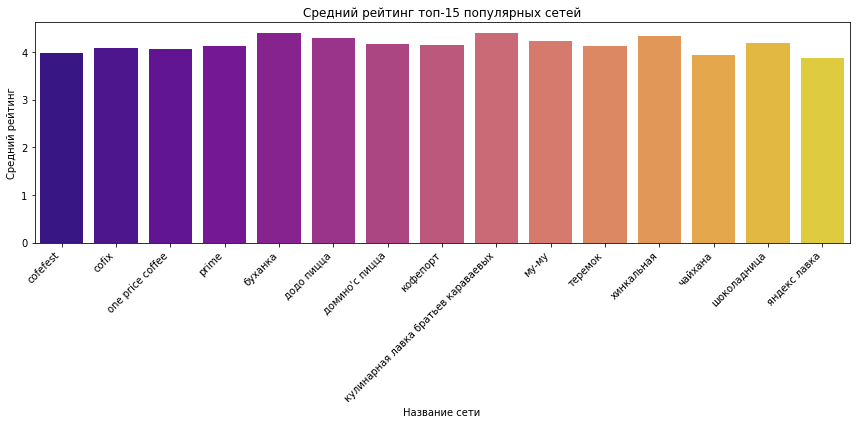

In [33]:
# Визуализация: столбчатая диаграмма среднего рейтинга
plt.figure(figsize=(12, 6))
sns.barplot(x='name', y='rating', data=top_15_chains_avg_rating, palette='plasma')
plt.title('Средний рейтинг топ-15 популярных сетей')
plt.xlabel('Название сети')
plt.ylabel('Средний рейтинг')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [34]:
category_counts = top_15_chains_avg_rating['category'].value_counts()
display(category_counts)

кофейня            5
кафе               3
ресторан           3
пиццерия           2
булочная           1
быстрое питание    1
Name: category, dtype: int64

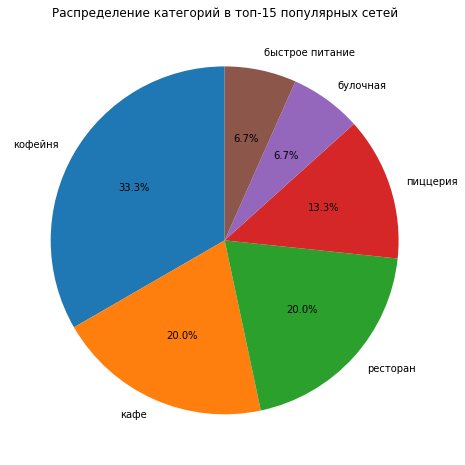

In [35]:
# Визуализация: распределение категорий в топ-15
category_counts = top_15_chains_avg_rating['category'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение категорий в топ-15 популярных сетей')
plt.show()

<font color='#777778'>Краткое пояснение:</font> больше всего в топ-15 заведений вошло тех, которые относятся к кофейням (33,3% или 5 точек из представленного топ-15), ресторанам и кафе (по 20% или по 3 точки). На третьем месте в топе - пиццерии (13,3%, или 2 точки). На четвертом - заведения быстрого питания и булочные (по 6,7%, или по 1 точке).

#### Промежуточные выводы: 
Обобщим, что больше всего топ-15 заведений представлен кофейнями (33,3% или 5 точек из представленного топ-15), ресторанам и кафе (по 20% или по 3 точки). На третьем месте в топе - пиццерии (13,3%, или 2 точки). На четвертом - заведения быстрого питания и булочные (по 6,7%, или по 1 точке).

- Если посмотреть на топ-3, то его составили такие заведения, как "Шоколадница", точек в сети которой насчитывается 120 (заведение относится к такой категории, как кофейня), "Домино'с Пицца" (76; пиццерия) и "Додо Пицца" (74; пиццерия). 


- Однако, если посмотреть на значение среднего рейтинга, то в топ-3 лидирует "Додо Пицца" со значением рейтинга 4,29, на втором месте - "Шоколадница" (4,18) и "Домино'с Пицца" (4,17). 


- Если смотреть шире. Обратим внимание на топ-15. Его, помимо перечисленных заведений, составили "One price coffee" (71 заведений сети), "Яндекс Лавка"	(69), "Cofix" (65), "Prime"	(50), "Хинкальная" (44), "Кофепорт"	(42), "Кулинарная лавка братьев Караваевых" (39), "Теремок"	(38), "Чайхана"	(37), "Cofefest" (32), "Буханка" (32) и "Му-Му"	(27). 

---

### Задача 8

Изучите вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируйте цены в Центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях? Результат сопроводите подходящими визуализациями.


In [36]:
pivot_district_double=df.pivot_table(values='middle_avg_bill', index='district', aggfunc=['mean','median'])
pivot_district_double=pivot_district_double.sort_values(by=[('mean', 'middle_avg_bill'), ('median', 'middle_avg_bill')], ascending=False)

display(pivot_district_double)

,mean,median
,middle_avg_bill,middle_avg_bill
district,,
Центральный АО,1191.057547,1000.0
Западный АО,1053.225490,1000.0
Северный АО,927.959627,650.0
Южный АО,834.398089,500.0
Северо-Западный АО,822.222930,700.0
Восточный АО,820.626923,575.0
Юго-Западный АО,792.561702,600.0
Северо-Восточный АО,716.611296,500.0


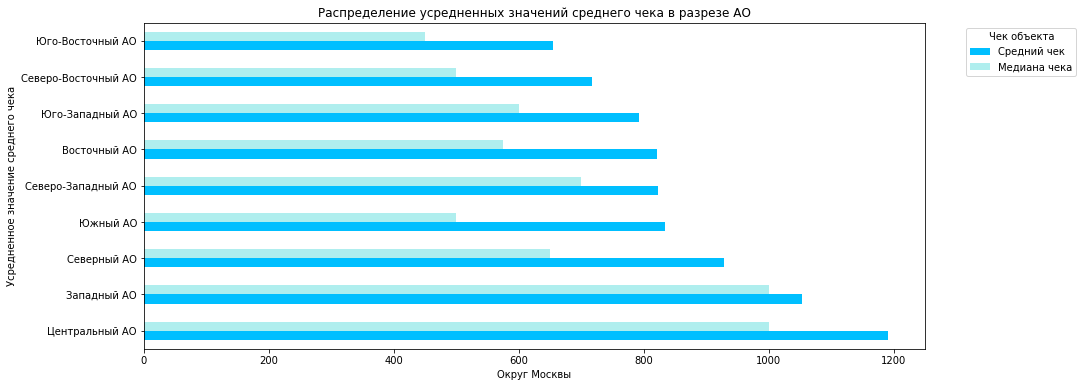

In [37]:
pivot_district_double.plot(kind='barh',
                          rot=0,
                          figsize=(14,6),
                          legend=False,
                          color=['deepskyblue', 'paleturquoise'])

plt.xlabel('Округ Москвы')
plt.ylabel('Усредненное значение среднего чека')
plt.legend(title='Чек объекта', labels=['Средний чек', 'Медиана чека'], loc='upper right', bbox_to_anchor=(1.20, 1))
plt.title('Распределение усредненных значений среднего чека в разрезе АО')

plt.show()

<font color='#777778'>Краткое пояснение:</font> как следует из диаграммы, самый высокий средний чек - в Центральном АО (1,19 тыс.руб.). На втором месте - в Западном АО (1,05 тыс.руб.), на третьем - в Северном АО (927 руб.). 

In [38]:
central_ao_df = df[df['district'] == 'Центральный АО']
pivot_category_bill = central_ao_df.pivot_table(values='middle_avg_bill', index='category', aggfunc=['mean', 'median'])

display(pivot_category_bill)


,mean,median
,middle_avg_bill,middle_avg_bill
category,,
"бар,паб",1479.739884,1250.0
булочная,1237.916667,962.5
быстрое питание,532.081633,450.0
кафе,765.176190,700.0
кофейня,794.764706,500.0
пиццерия,1104.839506,1000.0
ресторан,1561.059113,1250.0
столовая,319.886364,300.0


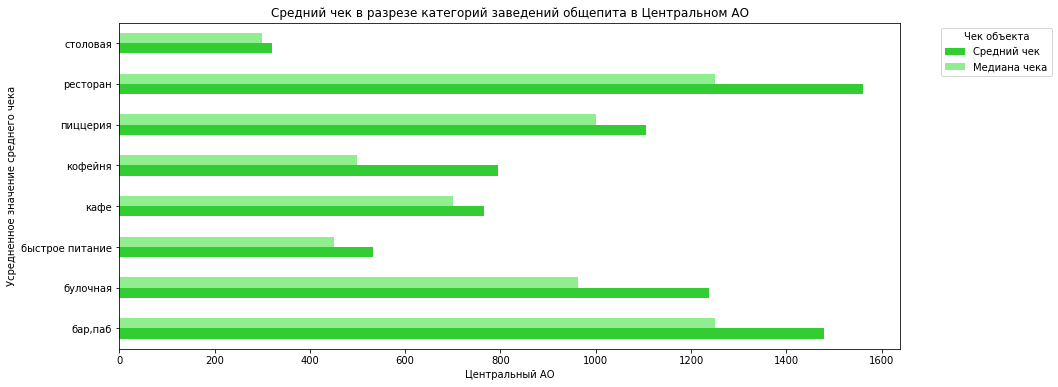

In [39]:
pivot_category_bill.plot(kind='barh',
                          rot=0,
                          figsize=(14,6),
                          legend=False,
                          color=['limegreen', 'lightgreen'])

plt.xlabel('Центральный АО')
plt.ylabel('Усредненное значение среднего чека')
plt.legend(title='Чек объекта', labels=['Средний чек', 'Медиана чека'], loc='upper right', bbox_to_anchor=(1.20, 1))
plt.title('Средний чек в разрезе категорий заведений общепита в Центральном АО')

plt.show()

<font color='#777778'>Краткое пояснение:</font> отдельно я решила вывести распределение усредненного значения среднего чека по категориям общепита в Центральном АО Москвы. Так, видно, что самый высокий средний чек - в ресторанах (1,56 тыс.руб.), на втором месте - в барах и пабах (1,48 тыс.руб.), на третьем - в булочных (1,24 тыс.руб.). 

---


### Промежуточный вывод:

<font color='#777778'>Про режим работы:</font> Из больше чем 8 тыс. проанализированных заведений общественного питания лишь 730 работают круглосуточно. Скорее всего такой формат интересен клиентам, но если они и ходят в определенную точку общепита, то явно не только потому, что та работает круглосуточно:) Возможно, коллегам не стоит выбирать круглосуточный режим работы, поскольку лучше сосредоточиться на других услугах и продуктах. 

<font color='#777778'>Про категории заведений:</font> Больше всего на карте Москвы можно встретить как кафе (2376 точек), на втором месте по количеству - ресторан (2042 точек), на третьем - кофейня (1413 точек). Меньше всего на карте Москвы можно встретить булочных (256 точек). Больше всего заведений общепита можно встретить в Центральном административном округе (далее - АО) (2242 точки общепита), меньше всего - в Северо-Западном административном округе (409 точек).

        - При этом в самом плотном по числу заведений АО — Центральном — преобладают рестораны (их насчитывается 670), кафе (464 точки) и кофейни (428 точек). А вот столовую (66 точек) или булочную (50 точек) можно встретить реже.

<font color='#777778'>Про сетевые/несетевые точки:</font> Для всех АО Москвы характерно преобладание сетевых булочных, кофеен и пиццерий (61,3%, 51% и 52,1% сетевых заведений в каждой категории соответственно). Это можно объяснить тем, что маленькие заведения за счет сетевого формата пытаются конкурировать на рынке с большими игроками (такими, как рестораны, например). Как раз среди ресторанов, кафе и пабов (последние выигрывают, вероятно, за счет дорогого и качественного алкоголя) можно не так часто встретить сетевые заведения (35,7%, 32,8% и 22% сетевых заведений в каждой категории соответственно).  

<font color='#777778'>Про места в заведениях:</font>По количеству посадочных мест лидируют рестораны, бары и пабы — в каждой точке их примерно от 50 до 150, кофейни (от 40 до 140 мест), кафе, пиццерии (от 40 до 120 мест). Более маленькие — булочные и заведения быстрого питания (от 30 мест). 

<font color='#777778'>Про рейтинг:</font>По рейтингу лидируют бары и пабы, кофейни, пиццерии и рестораны. В частности, у баров и пабов рейтинг 4,4, у булочных - 4,3, у кофеен - 4,2, кафе - 4,1. Однако можно заметить, что средний рейтинг заведений быстрого питания чуть ниже, чем у остальных категорий (4,05). Самый высокий средний рейтинг - у баров и пабов, кофеен, пиццерий и ресторанов.

    - Наибольшая корреляция рейтинга наблюдается с ценовой категорией (0,22), расположением (0,2) и категорией заведения (0,19). Корреляция рейтинга с ценовой категорией говорит о том, что у заведений с более высоким средним чеком выше и рейтинг. Корреляция с расположением говорит о том, что в чем более удобной локации расположено заведение, тем выше рейтинг. А вот корреляция с категорией наиболее интересна и, вероятно, говорит о предпочтениях отдельных пользователей.

<font color='#777778'>Про топ-15:</font> В топ-15 популярных сетей Москвы вошли такие заведения, как "Шоколадница", "Домино'с пицца", "Додо Пицца", "One price coffee", "Яндекс Лавка" и "Cofix". В целом, чаще всего в топе можно увидеть кофейни (33,3% или 5 точек из представленного топ-15), ресторанам и кафе (по 20% или по 3 точки). На третьем месте в топе - пиццерии (13,3%, или 2 точки). На четвертом - заведения быстрого питания и булочные (по 6,7%, или по 1 точке).

<font color='#777778'>Про средний чек:</font>
- Самый высокий средний чек — в Центральном АО (1,19 тыс.руб.). На втором месте - в Западном АО (1,05 тыс.руб.), на третьем - в Северном АО (927 руб.).

- Если смотреть на средний чек в разрезе категорий заведений в Центральном АО, то можно увидеть, что самый высокий средний чек — в ресторанах (1,56 тыс.руб.), на втором месте - в барах и пабах (1,48 тыс.руб.), на третьем - в булочных (1,24 тыс.руб.). 

## 4. Итоговый вывод и рекомендации

По результатам проведённого исследовательского анализа данных сформулируйте итоговый вывод и рекомендации для заказчика. Старайтесь акцентировать внимание на ключевых моментах исследования.

При составлении вывода придерживайтесь такой структуры:

1. Общий обзор проделанной работы.
2. Ответы на исследовательские вопросы, или главные выводы.
3. Рекомендации на основе анализа данных.

##### Общий обзор проделанной работы
В ходе исследования проанализировали данные 8406 заведений общественного питания, расположенных во всех (девяти) административных округах Москвы. Данные включали информацию об особенностях работы точек общепита, а также информацию о среднем чеке заведения и его рейтинг. Акцент исследования был сделан на том, чтобы выявить ключевые особенности рынка общепита столицы, взаимосвязи между средним чеком заведений и их рейтингом, а также выяснить, какая ниша рынка наиболее выгодна для открытия новой точки. 

##### Ответы на исследовательские вопросы, или главные выводы
Основная задача исследования состояла в том, чтобы проанализировать рынок общественного питания Москвы и понять, какая из ниш является наиболее выгодной для открытия новой точки общепита. Исследовательский анализ данных позволил сформировать ключевые особенности рынка:

- Из 8406 проанализированных заведений чаще всего можно встретить кафе (2376 точек), на втором месте по количеству - ресторан (2042 точек), на третьем - кофейня (1413 точек). Меньше всего на карте Москвы можно встретить булочных (256 точек). При этом в самом плотном по числу заведений административном округе (далее — АО) — Центральном — преобладают рестораны (их насчитывается 670), кафе (464 точки) и кофейни (428 точек). При этом среди сетевых преобладают булочные (61,3% из всех представленных заведений сетевые), пиццерии (52,1%) и кофейни (51%);


- Самый высокий средний чек — в Центральном АО (1,19 тыс.руб.). На втором месте - в Западном АО (1,05 тыс.руб.), на третьем - в Северном АО (927 руб.);


    - Если смотреть на средний чек в разрезе категорий заведений в Центральном АО, то можно увидеть, что самый высокий средний чек — в ресторанах (1,6 тыс.руб.), на втором месте — в барах и пабах (1,5 тыс.руб.), на третьем, что неожиданно, — в булочных (1,3 тыс.руб.). 
    - Большинство заведений общественного питания в Москве не работают круглосуточно;


- В топ-15 популярных сетей Москвы (по количеству точек сети) вошли такие заведения, как "Шоколадница" (120 точек сети), "Домино'с Пицца" (76), "Додо Пицца" (74), "One price coffee" (71), "Яндекс Лавка" (69), "Cofix" (65), "Prime"	(50), "Хинкальная" (44), "Кофепорт"	(42), "Кулинарная лавка братьев Караваевых" (39), "Теремок"	(38), "Чайхана"	(37), "Cofefest" (32), "Буханка" (32) и "Му-Му"	(27). В целом, чаще всего в топе можно увидеть кофейни (33,3% или 5 точек из представленного топ-15), ресторанам и кафе (по 20% или по 3 точки). На третьем месте в топе - пиццерии (13,3%, или 2 точки). На четвертом - заведения быстрого питания и булочные (по 6,7%, или по 1 точке); 


- По рейтингу лидируют бары и пабы, кофейни, пиццерии и рестораны. В частности, у баров и пабов рейтинг 4,4, у булочных - 4,3, у кофеен - 4,2, кафе - 4,1. Однако можно заметить, что средний рейтинг заведений быстрого питания чуть ниже, чем у остальных категорий (4,05). Самый высокий средний рейтинг - у баров и пабов, кофеен, пиццерий и ресторанов.


- Как правило, чаще всего в заведениях общепита от 40 до 150 посадочных мест. Более маленькие — булочные и заведения быстрого питания (от 30 мест).

##### Рекомендации на основе анализа данных

1. Выбор ниши:

⦁ <font color='#777778'>Ресторан:</font> высокий средний чек в Центральном АО (около 1,6 тыс.руб.) делает рестораны привлекательными с точки зрения потенциальной прибыли. Но в этом сегменте наблюдается довольно высокая конкуренция, а значит требуется тщательная проработка концепции и позиционирования.

⦁ <font color='#777778'>Бар/Паб:</font> второй по величине средний чек в Центральном АО (1,5 тыс.руб.) и высокий средний рейтинг делают бары/пабы перспективным направлением. Возможно, стоит обратить внимание на некруглосуточный режим работы большинства заведений и рассмотреть возможность работы в ночное время для увеличения прибыли.

⦁ <font color='#777778'>Булочная:</font> неожиданно высокий средний чек в Центральном АО (1,3 тыс.руб.) и высокая доля сетевых заведений (61,3%) указывают на потенциал этого сегмента. Формат "булочная-кафе" может быть особенно привлекательным, сочетая продажу выпечки с возможностью потребления на месте.

⦁ <font color='#777778'>Кофейня:</font> высокая популярность кофеен (3 место по количеству в Центральном АО, высокая представленность в топ-15 сетей, высокий средний рейтинг) делает эту нишу привлекательной, но требует выделения среди конкурентов. Можно рассмотреть специализацию (например, кофе класса specialty) или уникальную атмосферу.

    - Не рекомендуется: заведения быстрого питания, несмотря на присутствие в топ-15 сетей, имеют более низкий средний рейтинг и чек.

2. Расположение:

⦁<font color='#777778'>Центральный АО:</font> наибольший средний чек и высокая концентрация ресторанов, кафе и кофеен делают его привлекательным, но конкуренция здесь очень высока. Требуется тщательный выбор места и уникальная концепция.

⦁ <font color='#777778'>Западный и Северный АО:</font> второй и третий по величине средние чеки. Могут быть интересны с точки зрения баланса между потенциалом прибыли и уровнем конкуренции.

3. Ценовая политика:

- Стоит ориентироваться на средний чек в выбранном АО и категории заведения. Для ресторанов и баров/пабов в Центральном АО это 1,5-1,6 тыс.руб., для булочных — 1,3 тыс.руб.

4. Формат:

⦁ <font color='#777778'>Сетевое заведение:</font> франшиза может упростить запуск и дать доступ к готовой бизнес-модели, но потребует дополнительных вложений.

⦁ <font color='#777778'>Уникальное заведение:</font> позволит создать уникальное предложение и выделиться на фоне конкурентов, но потребует больших усилий по разработке концепции и продвижению.

5. Вместимость:

- Стоит ориентироваться на 40-150 посадочных мест, если выбран формат ресторана, бара/паба или кафе. Для булочных и заведений быстрого питания можно рассматривать меньшую вместимость (от 30 мест).

##### Перед открытием также нужно:

⦁ Детально проанализировать конкурентов. Тщательно изучить меню, цены, акции, отзывы посетителей конкурентов в выбранной нише и районе.

⦁ Провести маркетинговое исследование. Определить целевую аудиторию и разработать стратегию привлечения клиентов.

⦁ Провести консультации с экспертами. Нужны советы от опытных рестораторов и специалистов по маркетингу в сфере общественного питания.